In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mysql.connector
import pyodbc
conn = mysql.connector.connect(host='localhost',
                                       database='dbmslab',
                                       user='root',
                                       password='Geeky@Zain98')
cursor=conn.cursor(buffered=True)

In [3]:
movies=[]
cursor.execute('select * from webscraping')
records=cursor.fetchall()
for x in records:
    movies.append(x)

In [4]:
df=pd.DataFrame(movies)
df.head(5)

,0,1,2,3,4
0,1,The Shawshank Redemption,9.235858,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155773,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.991958,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983808,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953460,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


In [5]:
df.columns =['id', 'name', 'rating', 'year','cast']
df.head(5)

,id,name,rating,year,cast
0,1,The Shawshank Redemption,9.235858,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155773,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.991958,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983808,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953460,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


In [6]:
dfn=df[['rating','year']]
dfn.head(5)

,rating,year
0,9.235858,1994
1,9.155773,1972
2,8.991958,2008
3,8.983808,1974
4,8.953460,1957


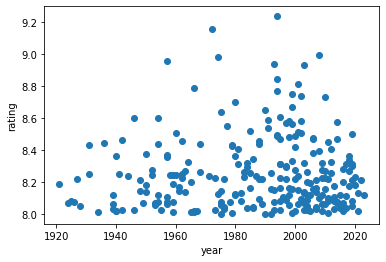

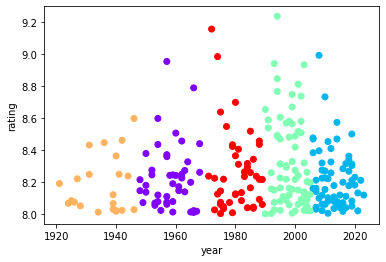

In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
# Visualize the data
plt.scatter(dfn['year'], dfn['rating'])
plt.xlabel('year')
plt.ylabel('rating')
plt.show()

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=5)
kmeans.fit(dfn)

# Visualize the clusters
plt.scatter(dfn['year'], dfn['rating'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('year')
plt.ylabel('rating')
plt.show()

### Hierarchial Clustering

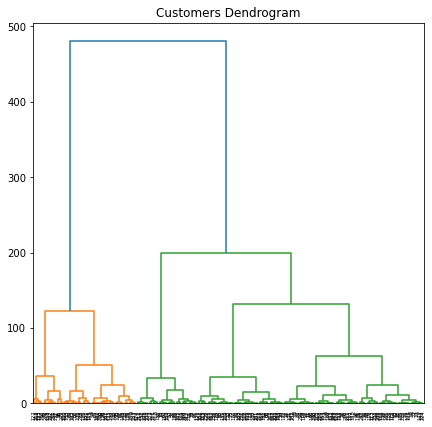

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(7, 7))
plt.title("Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data =dfn
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

### classification algorithms

#### for applying classification I have added a column of "superhit/hit" on the basis of rating

In [17]:
list=[]
for rating in dfn['rating']:
    if(rating>8.3):
        list.append('SuperHit')
    else:
        list.append('Hit')

In [21]:
dfn['status']=list
dfn

,rating,year,status
0,9.235858,1994,SuperHit
1,9.155773,1972,SuperHit
2,8.991958,2008,SuperHit
3,8.983808,1974,SuperHit
4,8.953460,1957,SuperHit
...,...,...,...
245,8.006132,1999,Hit
246,8.005625,2011,Hit
247,8.003812,1992,Hit
248,8.003487,1975,Hit


In [28]:
#shuffling dataframe
sdfn = dfn.sample(frac=1)


In [29]:
#creating dummies of status
sdfn=pd.get_dummies(sdfn,prefix=['status'])
sdfn

,rating,year,status_Hit,status_SuperHit
244,8.008930,1979,1,0
113,8.220745,1927,1,0
207,8.054981,1953,1,0
42,8.460979,1942,0,1
25,8.568772,1997,0,1
...,...,...,...,...
90,8.261216,2004,1,0
32,8.506232,1960,0,1
176,8.084520,1982,1,0
210,8.048316,2004,1,0


In [39]:
#sdfn=sdfn.drop('status_Hit',axis=1)
x=sdfn.drop('status_SuperHit',axis=1)
y=sdfn['status_SuperHit']

In [48]:
#training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3)


#### Applying Algorithms

#### 1. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy',accuracy)

accuracy 0.88


#### 2.KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy',accuracy)

accuracy 0.72


#### 3.Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=4)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("accuracy:",accuracy_score(Y_test,y_pred))


accuracy: 1.0


In [57]:
result=pd.DataFrame()
result['Classification Algorithm']=['Logistic Regression','KNN','Decision Tree']
result['Accuracy']=[0.88,0.72,1.0]
result

,Classification Algorithm,Accuracy
0,Logistic Regression,0.88
1,KNN,0.72
2,Decision Tree,1.00
